In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/Project-X-Lip-Reading

/content/drive/MyDrive/Project-X-Lip-Reading


In [2]:
# importing the dependencies
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import time

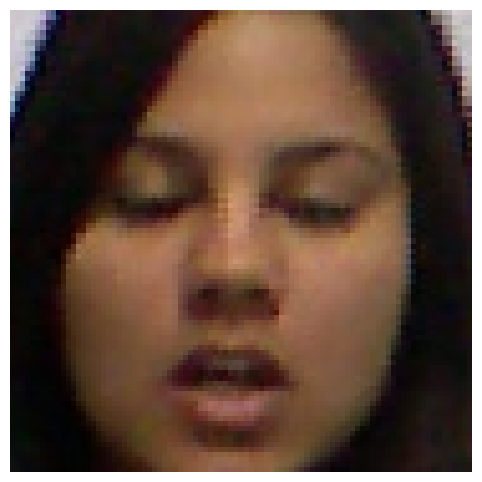

In [12]:
# function to extract face from image
def face_extractor(img):
  image = cv2.imread(img)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  face_classifier = cv2.CascadeClassifier('/content/drive/MyDrive/Project-X-Lip-Reading/Data Preprocessing/xml files/haarcascade_frontalface_default.xml')
  faces = face_classifier.detectMultiScale(image, 1.3, 5)

  if len(faces) > 0:
    for (x, y, w, h) in faces:
      cropped_image = image[y:y+h, x:x+w]
      cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2BGR)
  else:
    cropped_image = image

  return cropped_image

# Checking if the face extractor works or not
cropped_image = face_extractor('/content/drive/MyDrive/Project-X-Lip-Reading/dataset/F08/phrases/01/02/color_003.jpg')

if(cropped_image is not None):
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("No face found")

In [7]:
os.getcwd() # print current working directory

'/content/drive/MyDrive/Project-X-Lip-Reading'

In [ ]:
# path = '/content/drive/MyDrive/Project-X-Lip-Reading/03'
# for fname in os.listdir(path):
#   if not os.path.isdir(fname):
#     image_path = os.path.join(path, fname)
#   # removing all the depth images from dataset
#   if fname.lower().startswith('depth_'):
#       os.remove(image_path)
#   # replacing cropped face with original face in dataset
#   else:
#         cropped_face = face_extractor(image_path)
#         cv2.imwrite(image_path, cropped_face)

In [13]:
# replace the image in dataset with cropped face image
t1 = time.time()
for f in os.listdir('dataset'):
    f_path = os.path.join('dataset', f)
    if os.path.isdir(f_path):
        tx1 = time.time()
        for l in os.listdir(f_path):
            l_path = os.path.join(f_path, l)
            if os.path.isdir(l_path):
                for w in os.listdir(l_path):
                    w_path = os.path.join(l_path, w)
                    if os.path.isdir(w_path):
                        for p in os.listdir(w_path):
                            p_path = os.path.join(w_path, p)
                            if os.path.isdir(p_path):
                                for fname in os.listdir(p_path):
                                    if not os.path.isdir(fname):
                                        image_path = os.path.join(p_path, fname)
                                        print(image_path)
                                        # removing all the depth images from dataset
                                        if fname.lower().startswith('depth_'):
                                            os.remove(image_path)

                                        # replacing cropped face with original face in dataset
                                        else:
                                            cropped_face = face_extractor(image_path)
                                            cv2.imwrite(image_path, cropped_face)
        tx2 = time.time()
        print(f'Extracted faces for person {f}. Time taken : {tx2 - tx1} sec')

t2 = time.time()
print(f"Total time taken : {t2 - t1} sec")

Streaming output truncated to the last 5000 lines.
dataset/F08/phrases/01/04/depth_014.png
dataset/F08/phrases/01/01/depth_002.png
dataset/F08/phrases/01/01/color_002.jpg
dataset/F08/phrases/01/01/depth_001.png
dataset/F08/phrases/01/01/color_001.jpg
dataset/F08/phrases/01/01/depth_009.png
dataset/F08/phrases/01/01/depth_004.png
dataset/F08/phrases/01/01/depth_003.png
dataset/F08/phrases/01/01/depth_007.png
dataset/F08/phrases/01/01/depth_011.png
dataset/F08/phrases/01/01/color_004.jpg
dataset/F08/phrases/01/01/depth_010.png
dataset/F08/phrases/01/01/color_005.jpg
dataset/F08/phrases/01/01/depth_006.png
dataset/F08/phrases/01/01/color_008.jpg
dataset/F08/phrases/01/01/color_010.jpg
dataset/F08/phrases/01/01/color_003.jpg
dataset/F08/phrases/01/01/depth_005.png
dataset/F08/phrases/01/01/color_009.jpg
dataset/F08/phrases/01/01/color_006.jpg
dataset/F08/phrases/01/01/color_007.jpg
dataset/F08/phrases/01/01/depth_008.png
dataset/F08/phrases/01/01/color_011.jpg
dataset/F08/phrases/01/03/dep